# CNN-Zalando's Fashion-MNIST Dataset

In this replository a small Convolutional Neural Network is build to predict which kind of clothing (T-shirt/top, Trouser, Pullover, etc.) is shown on a given picture. <br> The dataset is Zalando's Fashion-MNIST consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

## Download & Analysis

First of all we have to download the dataset. Then we will take look at the datashape and the first image. Furthermore we will define the text labels.

x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_test shape: (10000, 28, 28) y_test shape: (10000,)
y = 9 Ankle boot


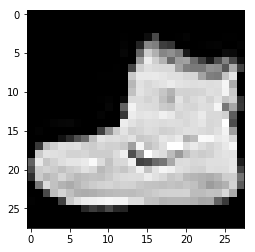

In [39]:
# Using the TensorFlow version 1.8.0
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Print train data and test data shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2
                        "Dress",        # index 3
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6
                        "Sneaker",      # index 7
                        "Bag",          # index 8
                        "Ankle boot"]   # index 9

# Print the label of the first image from the training dataset
label_index = y_train[0]
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# Show the first image from the training dataset
plt.imshow(x_train[0], cmap='gray')

## Data preprocessing

Before the training, the data have to be preprocessed. Keras expected input shape is (Number of samples x X-Axis x Y-Axis x Color Channels). Also the RGB coefficients (0-255) values are too high for our model to process (given a typical learning rate), so we target values between 0 and 1. Because the Fashion-MNIST Dataset is not one-hot encoded we need rectify this. For validation purposes the training data will be split in train / validation sets.

In [40]:
# Reshape the dimensions
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Split training data into train / validation sets (5000 validation / keep remaining 55,000 for training)
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

## Model

Our model will be built in Keras. Keras is a high-level neural networks API. It is capable of running on top of TensorFlow, CNTK, or Theano. Keras focus is enabling fast experimentation.

### Model definition

In [41]:
# CNN is build with help of Keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D

# Define the model
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Print the model summary
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1568)              0         
__________

### Model training

During the training process, after every epoch, the newest model weights will be saved (If the loss is smaller than that before). After trainig, the loss and accuracy history will be plotted.

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 54s 983us/step - loss: 0.5592 - acc: 0.7955 - val_loss: 0.3542 - val_acc: 0.8736

Epoch 00001: val_loss improved from inf to 0.35417, saving model to model_best_weights.hdf5
Epoch 2/30
55000/55000 [==============================] - 52s 953us/step - loss: 0.3989 - acc: 0.8540 - val_loss: 0.3017 - val_acc: 0.8924

Epoch 00002: val_loss improved from 0.35417 to 0.30173, saving model to model_best_weights.hdf5
Epoch 3/30
55000/55000 [==============================] - 51s 932us/step - loss: 0.3557 - acc: 0.8709 - val_loss: 0.2989 - val_acc: 0.8856

Epoch 00003: val_loss improved from 0.30173 to 0.29891, saving model to model_best_weights.hdf5
Epoch 4/30
55000/55000 [==============================] - 52s 937us/step - loss: 0.3313 - acc: 0.8785 - val_loss: 0.2634 - val_acc: 0.9064

Epoch 00004: val_loss improved from 0.29891 to 0.26343, saving model to model_best_weights.hdf5
Epoch 5/30


Text(0.5,0,'# of epochs')

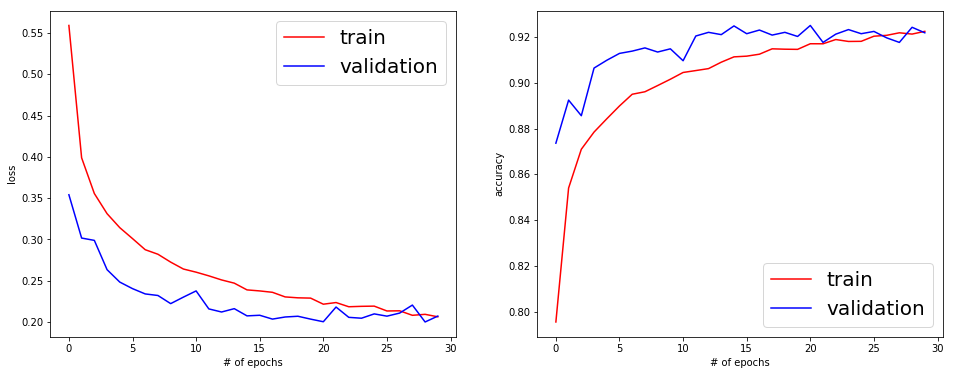

In [42]:
from keras.callbacks import ModelCheckpoint

# Training of the model
checkpointer = ModelCheckpoint(filepath='model_best_weights.hdf5', verbose = 1, save_best_only=True)
history = model.fit(x_train,
         y_train,
         batch_size=32,
         epochs=30,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])


# Plot loss and accuracy while training process
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
nepochs=len(history.history['loss'])
plt.plot(range(nepochs), history.history['loss'],     'r-', label='train')
plt.plot(range(nepochs), history.history['val_loss'], 'b-', label='validation')
plt.legend(prop={'size': 20})
plt.ylabel('loss')
plt.xlabel('# of epochs')
plt.subplot(1,2,2)
plt.plot(range(nepochs), history.history['acc'],     'r-', label='train')
plt.plot(range(nepochs), history.history['val_acc'], 'b-', label='validation')
plt.legend(prop={'size': 20})
plt.ylabel('accuracy')
plt.xlabel('# of epochs')

## Evaluation

As part of the evaluation we will take a look on the models accuracy in relation to the test set and plot the confusion matrix. Additionally 10 random images with their predicted labels and ground truth will be printed.


 Test accuracy: 0.9207


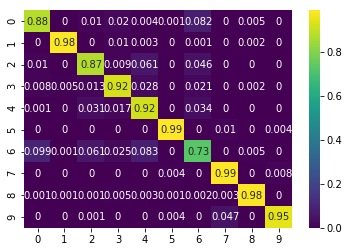

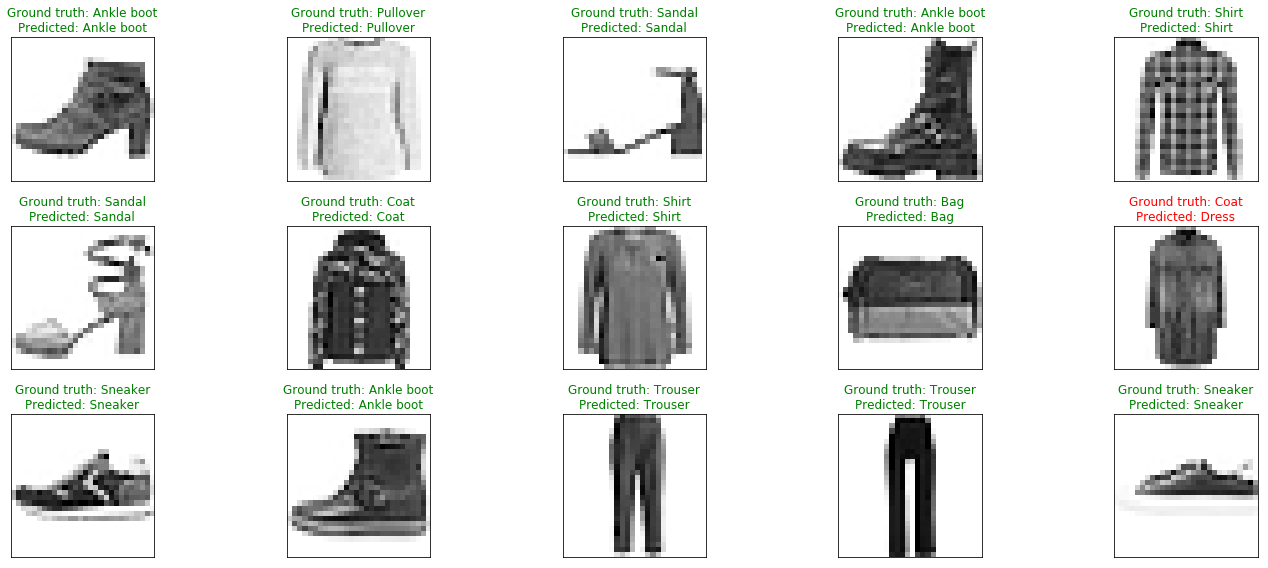

In [43]:
# Load the weights with the best validation accuracy
model.load_weights('model_best_weights.hdf5')

# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])

# Plot Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn

# Get the predictions from the model
y_pred_softmax = model.predict(x_test)
y_pred = np.int32([np.argmax(r) for r in y_pred_softmax])
y_test = np.int32([np.argmax(r) for r in y_test])

# Plot Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm = cm / cm.sum(axis=1)
sn.heatmap(cm, annot=True, cmap='viridis')

# Visualise 15 random test images along with their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]), cmap='Greys')
    predict_index = y_pred[index]
    true_index = y_test[index]
    # Set the title for each image
    ax.set_title("Ground truth: {}\nPredicted: {}".format(fashion_mnist_labels[predict_index],
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.tight_layout()